In [1]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import sklearn 
import joblib

from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from math import sqrt

from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df = pd.read_csv("/home/kduah/Desktop/Datain.csv") 

print(df.shape)

df.describe().transpose()

(13131, 15)


,count,mean,std,min,25%,50%,75%,max
DEPTH,13131.0,2598.337597,615.283554,1524.000000,2067.991800,2629.357200,3134.334600,3635.654400
CALI,13131.0,12.537325,2.107427,8.643100,11.030600,12.104500,13.873200,20.282900
GR,13131.0,87.235983,24.441441,28.004200,62.991050,98.395800,106.991700,131.366500
ILD,13131.0,2.383127,1.089810,0.581700,1.735400,2.218900,2.850300,9.117600
ITT,13131.0,0.095339,0.014940,0.059600,0.086300,0.091000,0.096800,0.180500
LLD,13131.0,2.396797,1.323735,0.597000,1.603350,2.171200,2.819900,28.348200
LLS,13131.0,2.667173,1.385152,0.675300,1.801850,2.447700,3.200650,29.775900
MSFL,13131.0,2.561160,2.395647,0.209000,1.171900,1.806700,3.515500,75.173600
NPHI,13131.0,0.257420,0.065861,0.037200,0.210700,0.243500,0.285300,0.490900
RHOB,13131.0,2.418670,0.121271,1.750600,2.356250,2.440400,2.503650,2.692100


In [3]:
X = df[['NPHI', 'RHOB', 'GR', 'LLD','LLS']]

y = df['Vs(m/s)'] #target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape); print(y_train) 

(10504, 5)
2576     7.137758
5601     7.708124
8391     7.358216
11728    8.230674
6495     8.915201
           ...   
11964    8.159367
5191     8.763259
5390     8.483957
860      5.692654
7270     7.635778
Name: Vs(m/s), Length: 10504, dtype: float64


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#trained 80% of the data set and tested 20%
print(X_train.shape); print(X_test.shape)

(10504, 5)
(2627, 5)


In [5]:
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(hidden_layer_sizes=(14,14,14
                                      ), activation = 'relu', solver='adam') #choice of hidden layers


mlp.fit(X_train,y_train)


predict_train = mlp.predict(X_train)

predict_test = mlp.predict(X_test)

In [6]:
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [7]:
predict_test

array([8.27079568, 7.7545143 , 8.28206628, ..., 8.57770536, 5.52576077,
       8.24441463])

In [22]:
print(mlp.coefs_)

[array([[ 7.10318884e-001, -1.17185043e+000,  2.04534717e-054,
         1.42671272e+000, -3.41042739e-028,  6.70266656e-001,
         1.06521097e+000,  3.22791069e-017,  3.25803145e-001,
        -1.19642393e+000, -1.35920033e+000,  1.46234302e+000,
        -1.19883205e+000, -5.35779821e-002],
       [ 4.48195925e-001, -1.59609119e-002,  2.75066709e-040,
        -4.51896183e-001, -6.90832083e-004,  1.77691811e-001,
        -4.16920528e-001, -1.31843481e-005, -3.75510193e-002,
        -2.01233501e-001,  4.63833552e-001, -4.81837568e-001,
        -5.85043714e-002, -3.80028867e-001],
       [ 1.27908793e-001,  2.51842502e-001,  9.28104686e-131,
         2.73203463e-001, -3.34001357e-002, -1.70953216e-001,
        -3.44892960e-002, -1.35225836e-002,  4.61243305e-002,
         1.86827038e-001,  2.49191208e-001,  2.46613646e-001,
         1.58789203e-001, -8.76281185e-003],
       [ 6.61915039e-001, -4.23341405e-001, -3.93900922e-040,
        -3.36581904e-001, -1.71380160e-002,  2.22308126e-0

In [23]:
print(mlp.intercepts_)

[array([-0.47859902, -0.17402735, -0.52523368, -0.64129169,  0.33528407,
        0.34381094,  0.34668617,  0.3368204 ,  0.18225361,  0.63547461,
        0.27838369, -0.36363397,  0.0979217 , -0.30594298]), array([ 0.20928894, -0.41906321,  0.0828068 , -0.45868203,  0.13253355,
        0.22636937, -0.26859722,  0.3662847 , -0.44359706,  0.02015746,
       -0.05879957, -0.16570862,  0.59505664,  0.22173145]), array([ 0.37878077, -0.34298587,  0.29565345, -0.08874105,  0.41517136,
        0.40724154,  0.1894095 ,  0.6778265 , -0.40268074,  0.24563268,
        0.74648724,  0.57071412,  0.35266321,  0.53493982]), array([0.54036012])]


In [8]:
mae = mean_absolute_error(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
rmse = np.sqrt(mse)

In [32]:
r2_score(y_test, predict_test)

0.8687484871623644

In [9]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.29
Mean squared error: 0.16
Root mean squared error: 0.40


In [10]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': predict_test.squeeze(), 'Difference':y_test-predict_test.squeeze()}) #printing them actual and predicted

In [11]:
print(df_preds)

         Actual  Predicted  Difference
4320   7.512070   8.270796   -0.758726
2236   7.904033   7.754514    0.149519
3578   7.894501   8.282066   -0.387565
9928   8.451527   8.469556   -0.018028
5762   7.913586   8.284593   -0.371008
...         ...        ...         ...
5434   8.939004   8.918244    0.020760
8440   7.512070   7.264286    0.247784
5748   8.169485   8.577705   -0.408221
88     5.546668   5.525761    0.020907
10976  8.271929   8.244415    0.027515

[2627 rows x 3 columns]


In [12]:
model_score_test = mlp.score(X_test, y_test)

In [13]:
print(f'model_score_test: {model_score_test:.2f}') #how well the model learns the test data, 82%

model_score_test: 0.87


In [14]:
model_score_train = mlp.score(X_train, y_train)

In [15]:
print(f'model_score_train: {model_score_train:.2f}')#how well the model learned the training data 

model_score_train: 0.87


In [37]:
r2_score(y_test, predict_test)

0.8687484871623644

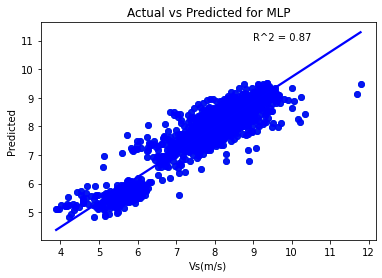

In [44]:
plt.scatter(y_test,predict_test);
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.annotate("R^2 = {:.2f}".format(r2_score(y_test, predict_test)), (9,11))
sns.regplot(x=y_test, y=predict_test, ci=None, color='blue').set(title="Actual vs Predicted for MLP")
#plt.annotate("R^2 = {:.3f}".format(r2_score(y_test, predict_test)), (9,12))
plt.savefig("ANN_MODEL.jpg")
plt.show()
